In [5]:
import time 
import sys
from blu import *  
# True parameters
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
del data
# posterior samples 
with open('./posterior/img1_det_m1m2xeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1m2xeff.pkl', 'rb') as f:
    img2=dill.load(f)
# population models 

# uniform distribution
with open('./pop_prior/uniform_pop_m1m2xeff.pkl', 'rb') as f:
    pop_uni=dill.load(f)
with open('./pop_prior/astro_m1m2chieff.pkl', 'rb') as f:
    pop_model=dill.load(f)

pop_true = mix_pop('./pop_prior/real_dist.pkl')
pop_power = mix_pop('./pop_prior/PL_pdf.pkl',wide=True)
N = 2e4
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)
OLU_pl = OddsRatio(gw_pop=pop_power,Nmc=N)
OLU_uni = OddsRatio(gw_pop=pop_uni,Nmc=N)
#OLU_obs = OddsRatio(gw_pop=pop_obs,Nmc=N)

load_data = True 
if load_data:
    data = np.load('blu_data.npz')
    blu_true = data['bt']
    blu_hdpgmm = data['bh']
    blu_pl = data['bp']
    blu_uni = data['bu']

In [13]:
bt = []
bh = []
for Nmc in [1e5,1e6,5e6]:
    print(Nmc)
    t0=time.time()
    OLU_true = OddsRatio(gw_pop=pop_true,Nmc=Nmc)
    OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
    bt.append(OLU_true.BayesFactor_PEuniform(img1[1],img2[1]))
    bh.append(OLU.BayesFactor_PEuniform(img1[1],img2[1]))
    print(time.time()-t0)
#blu_true = np.array(blu_true)
#blu_hdpgmm = np.array(blu_hdpgmm)

#blu_true = log_blu(blu_true)
#blu_hdpgmm = log_blu(blu_hdpgmm)


100000.0
16.954535961151123
1000000.0
18.69574499130249
5000000.0
24.118141889572144


In [14]:
bt = np.array(bt)
bh= np.array(bh)


bt = log_blu(bt)
bh = log_blu(bh)

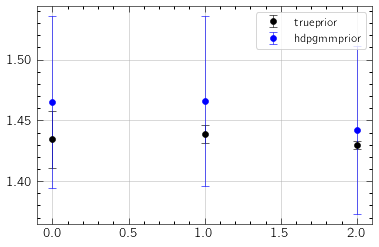

In [15]:

plt.errorbar(np.arange(bt.shape[0]),bt[:,0], bt[:,1],solid_capstyle='projecting',color='black',
                     capsize=4,fmt='o',label=r'$\mathrm{true prior}$')
plt.errorbar(np.arange(bt.shape[0]),bh[:,0], bh[:,1],solid_capstyle='projecting',color='blue',
                     capsize=4,fmt='o',label=r'$\mathrm{hdpgmm prior}$')
plt.legend()

In [6]:
m1z = m1z=m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
index = np.where(m1z<90)[0]

In [7]:
blu_uni=[]
blu_true=[]
blu_hdpgmm=[]
blu_pl=[]
#blu_obs=[]

for i in tqdm(index, total = int(index.size), desc = 'BLU-lensed pair'):
    blu_true.append(OLU_true.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_hdpgmm.append(OLU.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_pl.append(OLU_pl.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_uni.append(OLU_uni.BayesFactor_PEuniform(img1[i],img2[i]))
#    blu_obs.append(OLU_obs.BayesFactor_PEuniform(img1[i],img2[i]))

blu_true = np.array(blu_true)
blu_hdpgmm = np.array(blu_hdpgmm)
blu_pl = np.array(blu_pl)
blu_uni = np.array(blu_uni)
#blu_obs = np.array(blu_obs)

blu_true = log_blu(blu_true)
blu_hdpgmm = log_blu(blu_hdpgmm)
blu_pl = log_blu(blu_pl)
blu_uni = log_blu(blu_uni)
#blu_obs = log_blu(blu_obs)


-th pair:   4%|███▌                                                                                     | 1/25 [00:19<07:52, 19.68s/it]

19.679938077926636


-th pair: 100%|████████████████████████████████████████████████████████████████████████████████████████| 25/25 [08:36<00:00, 20.66s/it]


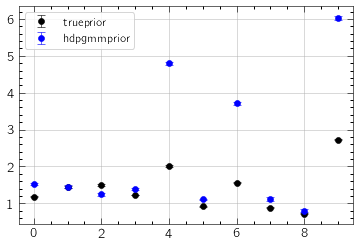

In [22]:

plt.errorbar(np.arange(blu_true.shape[0]),blu_true[:,0], blu_true[:,1],solid_capstyle='projecting',color='black',
                     capsize=4,fmt='o',label=r'$\mathrm{true prior}$')
plt.errorbar(np.arange(blu_hdpgmm.shape[0]),blu_hdpgmm[:,0], blu_hdpgmm[:,1],solid_capstyle='projecting',color='blue',
                     capsize=4,fmt='o',label=r'$\mathrm{hdpgmm prior}$')
plt.legend()

In [14]:
np.savez('blu_data.npz',bt=blu_true, bh=blu_hdpgmm, bp=blu_pl , bu=blu_uni)

Astro Dists: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.78it/s]


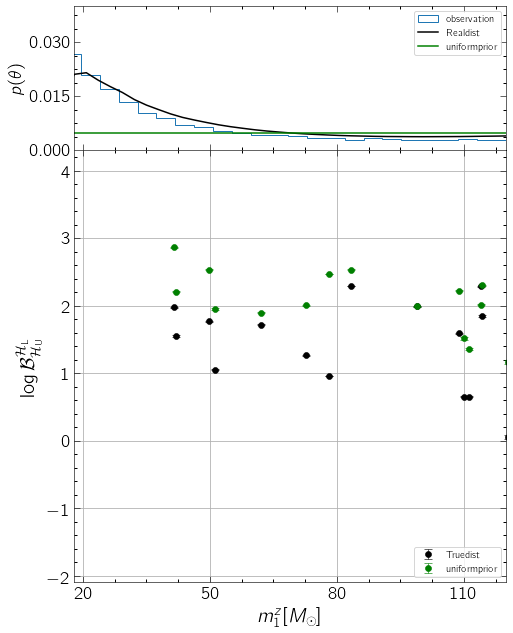

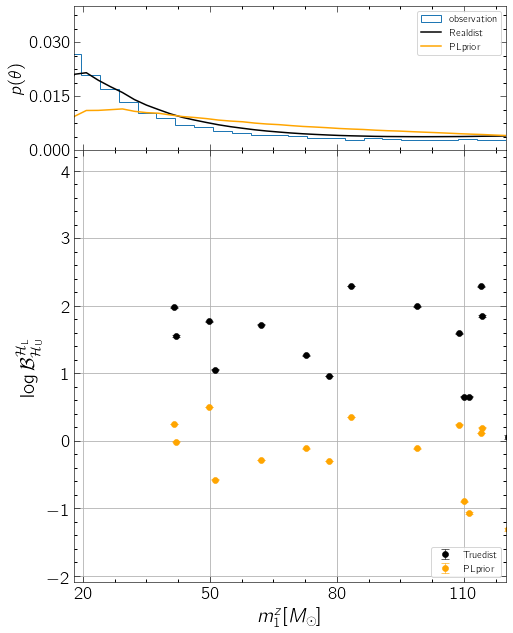

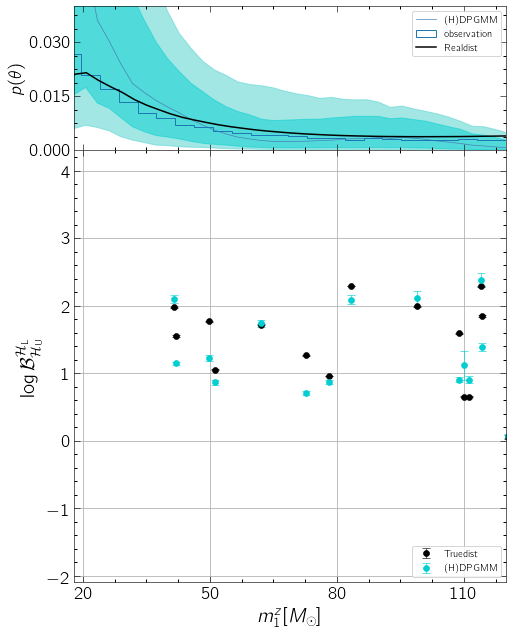

In [8]:
from marginal_plt import *
%matplotlib inline
xlim=(18,120)
ylim=(-2.1,4.3)
n = blu_true.shape[0]
plotting_two(blu_true[:n], blu_uni[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,uni_dist=True,xlim=xlim,ylim=ylim)
plt.savefig('blu_uni.pdf',bbox_inches = 'tight')
#ylim=(0,3.1)
plotting_two(blu_true[:n], blu_pl[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,PL_dist=True,xlim=xlim,ylim=ylim)
plt.savefig('blu_pl.pdf',bbox_inches = 'tight')
#ylim=(0.5,2.26)
#ylim=(0,5.1)
plotting_two(blu_true[:n], blu_hdpgmm[:n],pop_model,
             pop_true,pop_true, m1z[:n],math_blu,
             real_dist=True,HDPGMM_model=True,xlim=xlim,ylim=ylim)
plt.savefig('blu_dpgmm.pdf',bbox_inches = 'tight')

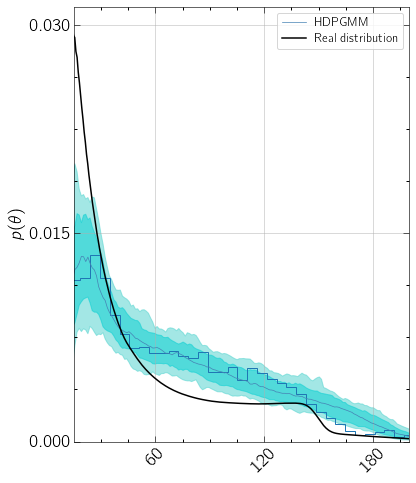

In [41]:
with open('/Users/damon/Desktop/lensingpop/result/obs_pop_m1m2xeff.pkl', 'rb') as f:
    pop_obs=dill.load(f)[0]


fig, ax = plt.subplots(figsize=(6,8))
ax.hist(pop_obs.rvs(5000)[:,0],density=True,bins=40,histtype='step')


with open('./posteriors_hier.pkl', 'rb') as f:
    draws=dill.load(f)

#pop_model = pop_model[:500]
from figaro.marginal import marginalise
draws = marginalise(draws)
draws= marginalise(draws,axis=-2)
dim = draws[0].dim
#dim =3
levels = [0.5, 0.68, 0.9]
levels = np.atleast_1d(levels)

all_bounds = np.atleast_2d([d.bounds for d in draws])

x_min = np.min(all_bounds, axis = -1).max(axis = 0)
x_max = np.max(all_bounds, axis = -1).min(axis = 0)
bounds = np.array([x_min, x_max]).T
K = dim
factor = 2.0          # size of one side of one panel
lbdim = 0.5 * factor  # size of left/bottom margin
trdim = 0.2 * factor  # size of top/right margin
whspace = 0.1         # w/hspace size
plotdim = factor * dim + factor * (K - 1.0) * whspace
dim_plt = lbdim + plotdim + trdim

# Format the figure.
lb = lbdim / dim_plt
tr = (lbdim + plotdim) / dim_plt

# 1D plots (diagonal)
n_pts=200
column=0
# Marginalise over all uninterested columns
dims = list(np.arange(dim))
dims.remove(column)
marg_draws = marginalise(draws, dims)
# Credible regions
lim = bounds[column]
x = np.linspace(lim[0], lim[1], n_pts+2)[1:-1]
dx   = x[1]-x[0]

probs = np.array([d.pdf(x) for d in marg_draws])

percentiles = [50, 5, 16, 84, 95]
p = {}
for perc in percentiles:
    p[perc] = np.percentile(probs, perc, axis = 0)
norm = p[50].sum()*dx
for perc in percentiles:
    p[perc] = p[perc]/norm



ax.fill_between(x, p[95], p[5], color = 'mediumturquoise', alpha = 0.5)
ax.fill_between(x, p[84], p[16], color = 'darkturquoise', alpha = 0.5)

ax.plot(x, p[50], lw = 0.7, color = 'steelblue',label = 'HDPGMM')
m  = np.linspace(5, 100*(1+2.3), 500)
dm = m[1]-m[0]
m1z_grid, m2z_grid = np.meshgrid(m,m,indexing='ij')
f_m = pop_true(np.array([m1z_grid.flatten(), m2z_grid.flatten()]).T)
f_m = np.reshape(f_m, m1z_grid.shape)
f_m[np.isnan(f_m)] = 0
f_m = np.sum(f_m, axis=1)*dm

norm = np.sum(f_m)*dm
ax.plot(m, f_m/norm, lw = 1.5, color='black', label = ' Real distribution')

ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.set_major_locator(MaxNLocator(3)) 

ax.set_ylabel(r'$p(\theta)$',fontsize=18)
#if labels is not None:
    #ax.set_xlabel(r'$m_1^z [M_{\odot}]$')
ticks = np.linspace(lim[0], lim[1], 5)
ax.set_xticks(ticks)
[l.set_rotation(45) for l in ax.get_xticklabels()]
#ax.set_xlim(lim[0], lim[1])
ax.set_xlim(15.2,200)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend()